#Download DataSet

In [ ]:
#download data train 
!gdown --id 1xyyCZ9nfisHPT0EFfFckNdyRuXfM7F5r

Downloading...
From: https://drive.google.com/uc?id=1xyyCZ9nfisHPT0EFfFckNdyRuXfM7F5r
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 71.0MB/s]


#Library

In [ ]:
#library Pandas 
import pandas as pd
#library Numpy
import numpy as np
#Skalling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import math
import random 
# library visualisasi
import matplotlib.pyplot as plt
import seaborn as sb

#Read csv

In [ ]:
#read data train 
df = pd.read_csv('kendaraan_train.csv')

In [ ]:
#lihat 10 data teratas 
df.head(10)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
6,7,Wanita,33.0,1.0,8.0,0.0,NaN,Pernah,32435.0,124.0,215.0,1
7,8,Pria,23.0,NaN,28.0,1.0,< 1 Tahun,Tidak,26869.0,152.0,222.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
9,10,NaN,54.0,1.0,29.0,0.0,> 2 Tahun,Pernah,88883.0,124.0,28.0,1


In [ ]:
#lihat sample data
df.sample(2)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
88470,88471,Pria,62.0,1.0,28.0,0.0,1-2 Tahun,Pernah,48925.0,124.0,197.0,0
227508,227509,Wanita,42.0,1.0,28.0,0.0,1-2 Tahun,Pernah,34655.0,26.0,120.0,0


In [ ]:
#Drop feature ID pada dataset
df.drop(['id'],inplace=True, axis=1)

#Explorasi Data 

Pada Tahap ini yang di eksplorasi adalah 

1. informasi dataset
2. Deskripsi statistik dari dataset
3. Dimensi dataset
4. Mengecek Missing value 
5. Mencek Duplikasi data 

In [ ]:
#melihat informasi data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


In [ ]:
#melihat dimensi data
df.shape

(285831, 11)

In [ ]:
#melihat deskripsi statistik dari data 
df.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


#Visualisasi Data 

Berdasarkan kategori 
1. data kontinu (umur, premi, lama_berlangganan)
2. data kategori ordinal (umur_kendaraan) 
3. data kategori nominal (jenis_kelamin, SIM, Kode saerah, Sudah Asuransi, Kendaraan_rusak, Kanal_penjualan)
4. Label (Tertarik)


In [ ]:
df.sample(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
280930,Pria,53.0,1.0,33.0,0.0,1-2 Tahun,Pernah,35525.0,26.0,84.0,0
111955,Pria,25.0,1.0,39.0,0.0,< 1 Tahun,Pernah,27608.0,152.0,29.0,0
78021,Wanita,50.0,1.0,46.0,1.0,1-2 Tahun,Tidak,23761.0,NaN,NaN,0
38424,Pria,76.0,1.0,8.0,0.0,1-2 Tahun,Pernah,NaN,26.0,214.0,0
159120,Wanita,77.0,1.0,28.0,1.0,1-2 Tahun,Tidak,35797.0,NaN,241.0,0
167732,Pria,25.0,1.0,15.0,1.0,< 1 Tahun,Tidak,35203.0,152.0,33.0,0
131372,Pria,54.0,1.0,28.0,0.0,NaN,Pernah,2630.0,NaN,278.0,0
104458,NaN,54.0,1.0,47.0,1.0,1-2 Tahun,Pernah,36168.0,26.0,70.0,0
9542,Pria,70.0,1.0,28.0,0.0,1-2 Tahun,Pernah,61826.0,122.0,171.0,1
227148,Pria,50.0,1.0,28.0,0.0,1-2 Tahun,Pernah,2630.0,26.0,29.0,0


1. vidualisasi data kontinu (Umur, Premi, Lama berlangganan) 

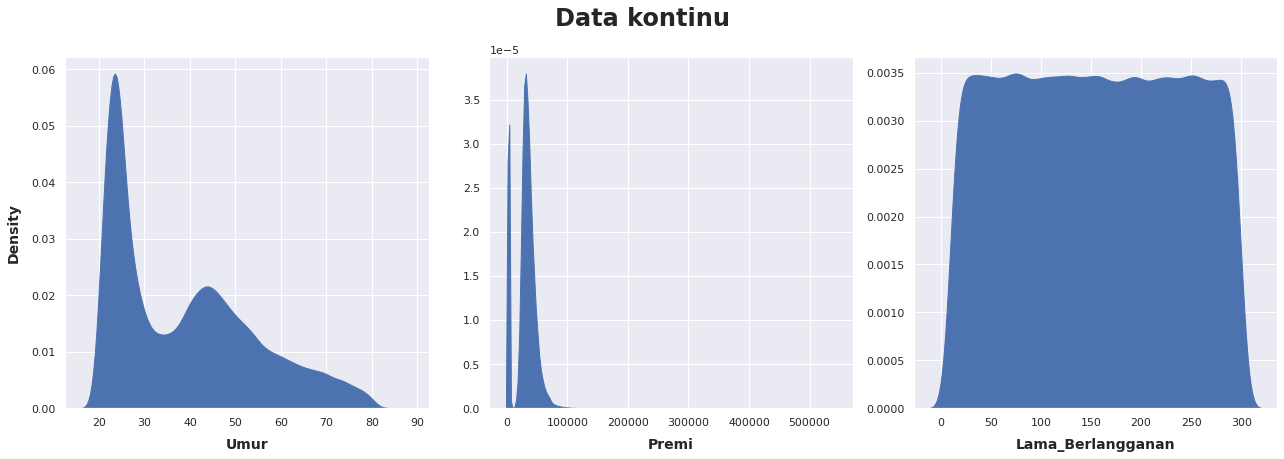

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sb.kdeplot(data=df, x="Umur", ax=ax[0], shade=True, alpha=1)
sb.kdeplot(data=df, x="Premi", ax=ax[1], shade=True, alpha=1)
sb.kdeplot(data=df, x="Lama_Berlangganan", ax=ax[2], shade=True, alpha=1)
col = ["Umur", "Premi", "Lama_Berlangganan"]
for i in range(3) : 
    ax[i].set_xlabel(col[i], fontsize=14, labelpad=10, fontweight='bold')
    ax[i].set_ylabel(None)

ax[0].set_ylabel("Density", fontsize=14, labelpad=10, fontweight='bold')

  
plt.suptitle("Data kontinu\n", ha='center', va='center', x=0.5, y=1, fontsize=24, fontweight='bold')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


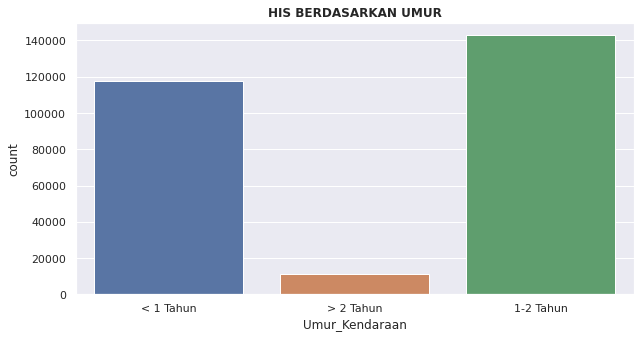

In [ ]:
sb.set()
plt.figure(figsize=(10,5))
sb.countplot(df['Umur_Kendaraan'])
plt.xlabel('Umur_Kendaraan')
plt.title('HIS BERDASARKAN UMUR', fontweight='bold')
plt.show()

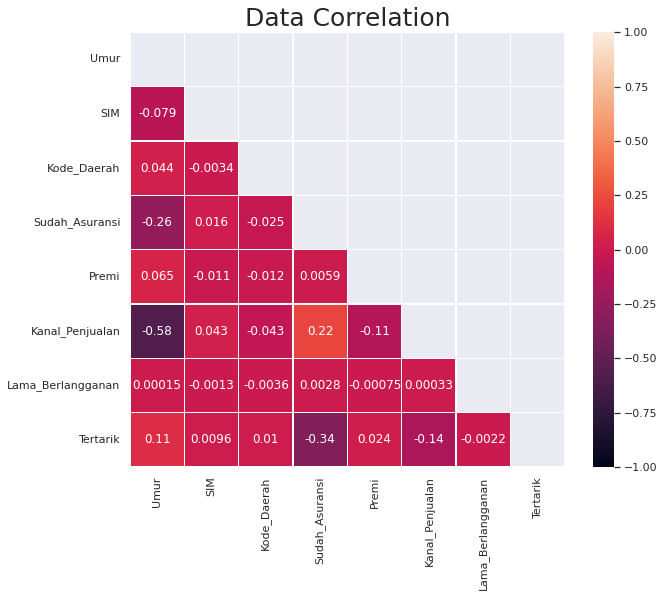

In [ ]:
#melihat Korelasi antardata 

correlation_X = df.corr()

plt.figure(figsize=(10,8))

plt.title('Data Correlation', y=1, size=25)
mask = np.triu(np.ones_like(correlation_X, dtype=bool))

sb.heatmap(correlation_X, mask=mask, vmin=-1, vmax=1, annot= True, linewidths= .5, square=True)

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


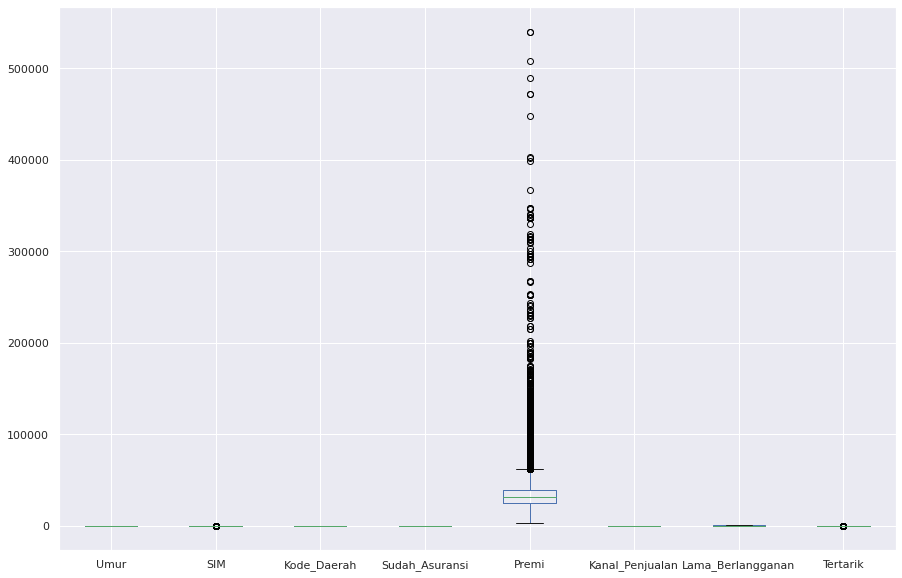

In [ ]:
#Mencek Outlier seluruh data dengan Boxplot
df.plot(kind='box', figsize=(15, 10) )

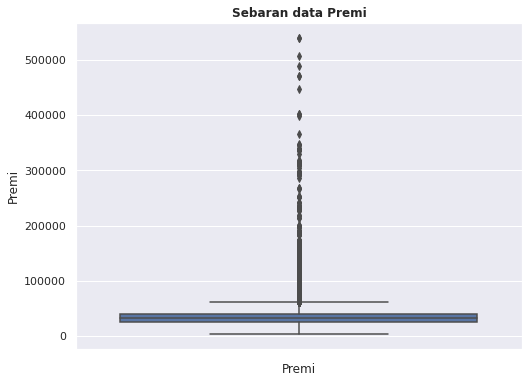

In [ ]:
#melihat Boxplot dari data SIM, premi, dan tertarik 

plt.figure(figsize=(8,6))
sb.boxplot(data=df, y=df.Premi)
plt.xlabel('Premi')
plt.title('Sebaran data Premi', fontweight='bold')
plt.show()

#Pre-Processing Data

yang dilakukan pada tahap ini 

1. Handle Outlier 
2. Label Encoding 
3. Handle Missing value
4. Handle Duplicate Data
5. Skewness Distribution
6. Normalisasi 
7. Split Dataset  

**Handle Outlier** 

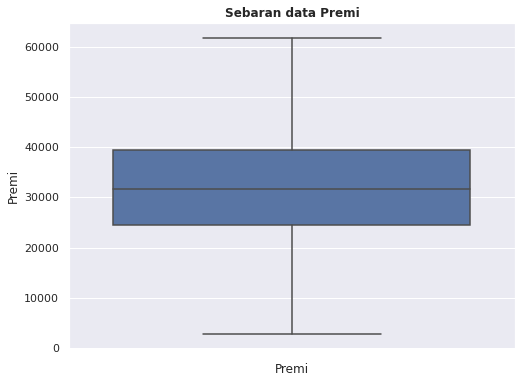

In [ ]:
# Handle Outlier dengan metode IQR

Q1 = df['Premi'].quantile(0.25)
Q3 = df['Premi'].quantile(0.75)
IQR = Q3 - Q1

Max = Q3 + (1.5 * IQR)
Min = Q1 - (1.5 * IQR)

more_than = df['Premi'] > Max
lower_than = df['Premi'] < Min

df['Premi'] = df['Premi'].mask(more_than, Max)
df['Premi'] = df['Premi'].mask(lower_than, Min)

plt.figure(figsize=(8,6))
sb.boxplot(data=df, y=df.Premi)
plt.xlabel('Premi')
plt.title('Sebaran data Premi', fontweight='bold')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


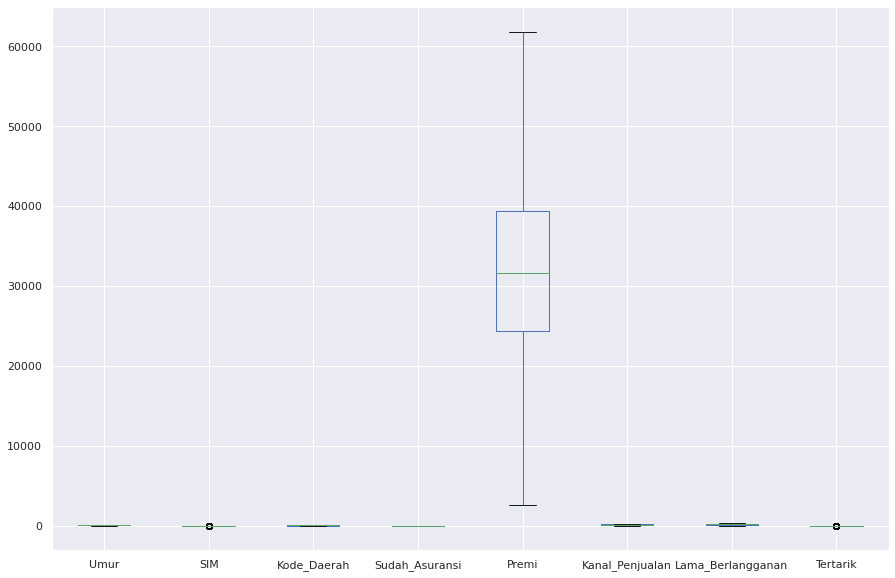

In [ ]:
df.plot(kind='box', figsize=(15, 10) )

**Label Encoding**

In [ ]:
#Label Encoding 

df['Jenis_Kelamin'] = df['Jenis_Kelamin'].replace(['Wanita', 'Pria'], [0, 1])
df['Umur_Kendaraan'] = df['Umur_Kendaraan'].replace(['< 1 Tahun', '1-2 Tahun', '> 2 Tahun'], [0, 1, 2])
df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].replace(['Tidak', 'Pernah'], [0, 1])


In [ ]:
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0


**Handle Missing Value** 

In [ ]:
# cek Missing value 

print(df.isnull().sum())

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64


In [ ]:
#Handle Missing Value dengan mengisi missing value dengan mean 
#df_train = df.fillna(df_train.mean())
#Handle Missing Value dengan mendrop missing value
df_train = df.dropna()
print(df_train.isnull().sum())

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


In [ ]:
df_train.shape

(171068, 11)

**Handle Data Duplikat**

In [ ]:
#Cek Data Duplikat 
duplicate = list(df_train.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 82


In [ ]:
#Handle Data Duplikasi 
df_train.drop_duplicates(inplace=True)
duplicate = list(df_train.duplicated())
print("Data Duplikasi :", duplicate.count(True))

Data Duplikasi : 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
3,0.0,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
5,1.0,21.0,1.0,35.0,1.0,0.0,0.0,22735.0,152.0,171.0,0
8,0.0,20.0,1.0,8.0,1.0,0.0,0.0,30786.0,160.0,31.0,0


**Cek Skewnes Distribution**

In [ ]:
#Melihat Skewnws distribution
df_train.skew()

Jenis_Kelamin        -0.163057
Umur                  0.673346
SIM                 -21.909400
Kode_Daerah          -0.117059
Sudah_Asuransi        0.161545
Umur_Kendaraan        0.257715
Kendaraan_Rusak      -0.017944
Premi                -0.354449
Kanal_Penjualan      -0.908874
Lama_Berlangganan     0.003581
Tertarik              2.315469
dtype: float64

**Normalisasi**

In [ ]:
#Normalisasi dengan menggunakan MinMaxSacller 
from sklearn.preprocessing import MinMaxScaler
df_train = pd.DataFrame(MinMaxScaler().fit_transform(df_train))
df_train.columns = ['Jenis_Kelamin',	'Umur',	'SIM',	'Kode_Daerah',	'Sudah_Asuransi',	'Umur_Kendaraan',	'Kendaraan_Rusak',	'Premi',	'Kanal_Penjualan',	'Lama_Berlangganan',	'Tertarik']
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.428911,0.932099,0.301038,0.0
1,1.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.391270,0.172840,0.512111,0.0
2,0.0,0.584615,1.0,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391,0.0
3,1.0,0.015385,1.0,0.673077,1.0,0.0,0.0,0.339512,0.932099,0.557093,0.0
4,0.0,0.000000,1.0,0.153846,1.0,0.0,0.0,0.475469,0.981481,0.072664,0.0
...,...,...,...,...,...,...,...,...,...,...,...
170981,0.0,0.046154,1.0,0.076923,1.0,0.0,0.0,0.394445,0.932099,0.716263,0.0
170982,0.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.710197,0.932099,0.138408,0.0
170983,0.0,0.046154,1.0,0.961538,1.0,0.0,0.0,0.795729,0.932099,0.747405,0.0
170984,1.0,0.738462,1.0,0.134615,1.0,0.5,0.0,0.470690,0.759259,0.899654,0.0


In [ ]:
df_train.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
31577,1.0,0.276923,1.0,0.538462,0.0,0.5,1.0,0.767157,0.759259,0.847751,0.0
45475,1.0,0.830769,1.0,0.538462,1.0,0.5,0.0,0.619311,0.759259,0.442907,0.0
138120,1.0,0.076923,1.0,0.269231,0.0,0.5,1.0,0.407178,0.759259,0.588235,0.0
102330,0.0,0.353846,1.0,0.538462,1.0,0.5,0.0,0.675714,0.154321,0.961938,0.0
58560,0.0,0.246154,1.0,0.538462,0.0,0.5,1.0,0.965511,0.759259,0.809689,0.0


Pemilihan Atribut dengan PCA

In [ ]:
from sklearn.decomposition import PCA
df_pca = df_train.copy()
df_label_train = df_train['Tertarik']
del df_pca['Tertarik']

pca_train = PCA(n_components=2)
principalComponents_train = pca_train.fit_transform(df_pca)

df_pca= pd.DataFrame(data = principalComponents_train
             , columns = ['component 1', 'component 2'])
df_pca['Tertarik'] = df_label_train.values




In [ ]:
df_pca.sample(5)

,component 1,component 2,Tertarik
38524,-0.764292,-0.529328,0.0
108348,-0.757499,-0.533546,0.0
24236,0.736175,-0.302723,0.0
8531,-0.410890,-0.721252,0.0
34837,0.733054,-0.302420,1.0


In [ ]:
'''
from google.colab import  files
df.to_csv('kendaraan_preprocessed.csv', index=False)
files.download('kendaraan_preprocessed.csv')

df_pca.to_csv('kendaraan_preprocessed_pca.csv', index=False)
files.download('kendaraan_preprocessed_pca.csv')
'''

"\nfrom google.colab import  files\ndf.to_csv('kendaraan_preprocessed.csv', index=False)\nfiles.download('kendaraan_preprocessed.csv')\n\ndf_pca.to_csv('kendaraan_preprocessed_pca.csv', index=False)\nfiles.download('kendaraan_preprocessed_pca.csv')\n"